# Read the PIV velocity data of a 2D pitching foil
- Calculate the vorticity and Q value
- Plot the vorticity, Q, influence potential, and vorticity-induced force/moment density

**Author: Yuanhang Zhu**

**Aug 1, 2023**

In [1]:
using DelimitedFiles
using Plots 

In [2]:
# Set location of the 2D PIV data
fileroot = "/Users/jeff/Google Drive/My Drive/AIAA Massive Sep Flows Paper/2D_PIV_pitching_foil_YZ/"

"/Users/jeff/Google Drive/My Drive/AIAA Massive Sep Flows Paper/2D_PIV_pitching_foil_YZ/"

In [3]:
function calculate_vorticity_Q(x::Matrix{T}, y::Matrix{T}, u::Matrix{T}, v::Matrix{T}) where T
    nx, ny = size(u,2), size(u,1)
    vorticity = similar(u, T)
    q_value = similar(u, T)
    
    for j in 2:(ny-1)
        for i in 2:(nx-1)
            dv_dx = (v[j, i+1] - v[j, i-1]) / (x[j, i+1] - x[j, i-1])
            du_dy = (u[j+1, i] - u[j-1, i]) / (y[j+1, i] - y[j-1, i])
            
            # Calculate rate of strain tensor components
            ds_dx = 0.5 * (du_dy + dv_dx)
            du_dx = (u[j, i+1] - u[j, i-1]) / (x[j, i+1] - x[j, i-1])
            dv_dy = (v[j+1, i] - v[j-1, i]) / (y[j+1, i] - y[j-1, i])
            ds_dy = 0.5 * (du_dx + dv_dy)
            
            # Calculate vorticity
            vorticity[j, i] = dv_dx - du_dy

            # Calculate Q values
            # q_value[j, i] = 0.5 * (vorticity[j, i]^2 + ds_dx^2 + ds_dy^2)
            q_value[j, i] = -du_dy * dv_dx + du_dx * dv_dy
        end
    end
    
    return vorticity, q_value
end

calculate_vorticity_Q (generic function with 1 method)

In [4]:
num = 1; # phase number

shape = readdlm(joinpath(fileroot,"foil shape","foil_coordinate_$num.txt"), ',', '\n')

xfoil = shape[:,1];
yfoil = shape[:,2];

In [5]:
velocity_data = readdlm(joinpath(fileroot,"PIV data","velocity_field_$num.txt"), ',', '\n');

xn = 119; # number of values in x-direction
yn = 81; # number of values in y-direction

x = velocity_data[:,1];
y = velocity_data[:,2];
u = velocity_data[:,3];
v = velocity_data[:,4];

xdata = reshape(x, (xn, yn));
ydata = reshape(y, (xn, yn));
udata = reshape(u, (xn, yn));
vdata = reshape(v, (xn, yn));

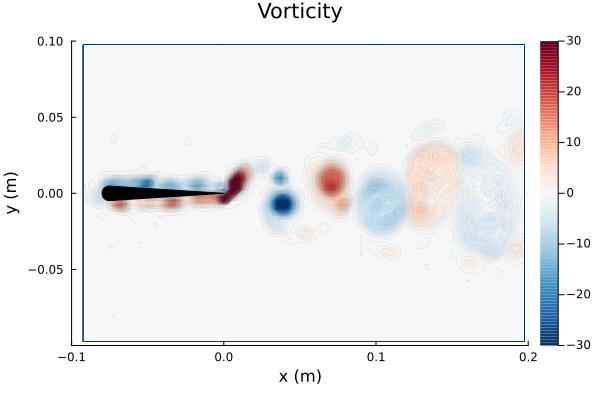

In [34]:
vorticity, q_value = calculate_vorticity_Q(ydata, xdata, -vdata, -udata);

p1 = contourf(xdata[2:end-1,1], ydata[1,2:end-1], max.(min.(vorticity[2:end-1,2:end-1]', 30), -30), levels=100, lw=0, xlabel="x (m)", ylabel="y (m)", title="Vorticity", color=cgrad(:RdBu,rev=true), aspect_ratio=:equal, clim=(-30,30), xlims=(-0.1, 0.2), ylims=(-0.1,0.1));
plot!(xfoil,yfoil,fill=true,aspect_ratio=:equal,c=:black,legend = false)

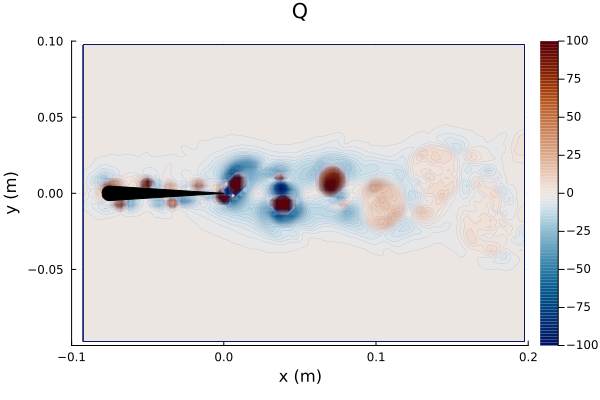

In [7]:
p2 = contourf(xdata[2:end-1,1], ydata[1,2:end-1], max.(min.(q_value[2:end-1,2:end-1]', 100), -100), levels=100, lw=0, xlabel="x (m)", ylabel="y (m)", title="Q", color=:vik, aspect_ratio=:equal, clim=(-100,100), xlims=(-0.1, 0.2), ylims=(-0.1,0.1));
plot!(xfoil,yfoil,fill=true,aspect_ratio=:equal,c=:black,legend = false)

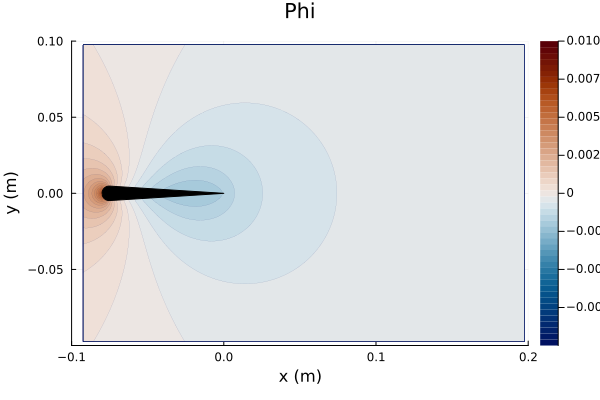

In [8]:
phi_drag = readdlm(joinpath(fileroot,"Potential","drag_potential","phi_drag_$num.txt"), ',', '\n')[:,3]; # load phi field data

phi_drag_data = reshape(phi_drag, (yn, xn))

p3 = contourf(xdata[2:end-1,1], ydata[1,2:end-1], phi_drag_data[2:end-1,2:end-1], levels=50, lw=0, xlabel="x (m)", ylabel="y (m)", title="Phi", color=:vik, aspect_ratio=:equal, clim=(-0.01,0.01), xlims=(-0.1, 0.2), ylims=(-0.1,0.1));
plot!(xfoil,yfoil,fill=true,aspect_ratio=:equal,c=:black,legend = false)

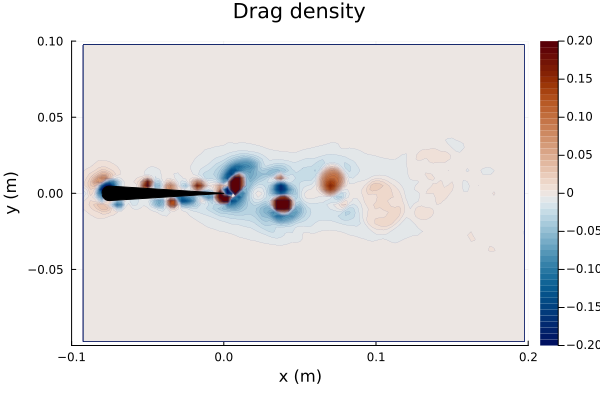

In [9]:
drag_density = -2*.*(q_value',phi_drag_data) # calculate vorticity-induced force density
p3 = contourf(xdata[2:end-1,1], ydata[1,2:end-1], max.(min.(drag_density[2:end-1,2:end-1], 0.2), -0.2), levels=50, lw=0, xlabel="x (m)", ylabel="y (m)", title="Drag density", color=:vik, aspect_ratio=:equal, clim=(-0.2,0.2), xlims=(-0.1, 0.2), ylims=(-0.1,0.1));
plot!(xfoil,yfoil,fill=true,aspect_ratio=:equal,c=:black,legend = false)